In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import img_to_array , load_img
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Building our Model To train the data

In [39]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=4 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [40]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

Preparing our data using data generator

In [41]:
train_datagen = ImageDataGenerator(
     rotation_range=45,
     width_shift_range=0.2,
     height_shift_range=0.2,
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255,
     fill_mode='reflect'
)

train_data = train_datagen.flow_from_directory(directory= "C:/Users/prans/Brain_Dead_hackathon/Train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 1815 images belonging to 4 classes.


{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

In [42]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:/Users/prans/Brain_Dead_hackathon/Test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )


Found 369 images belonging to 4 classes.


visualizaing the data that is fed to train data gen

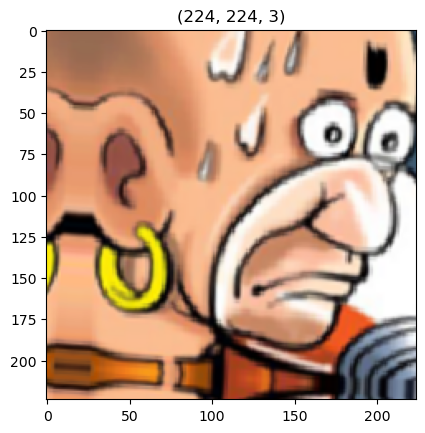

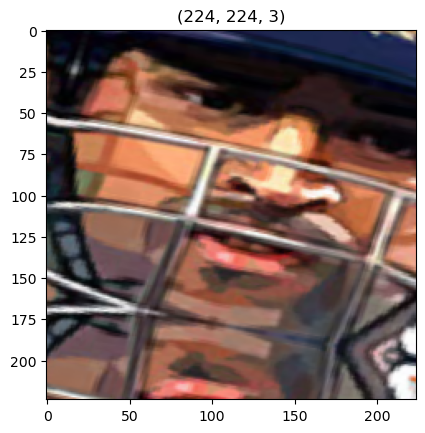

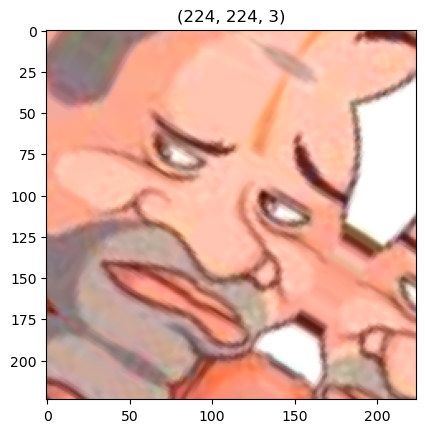

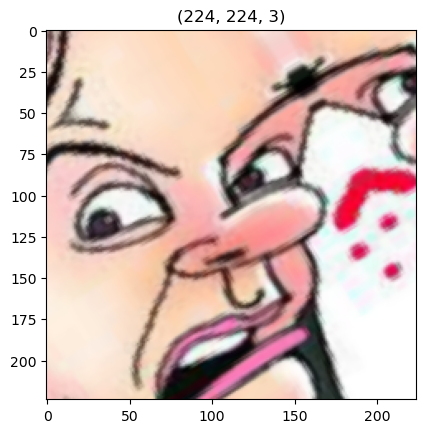

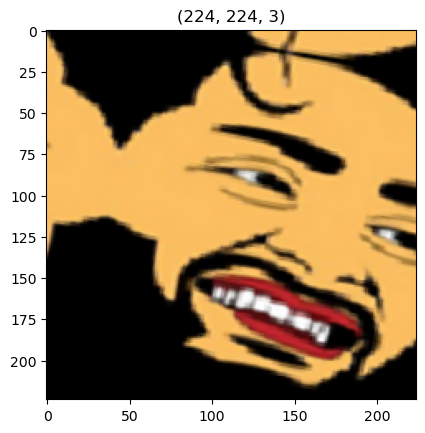

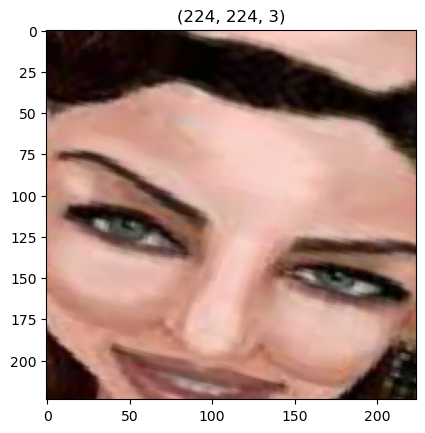

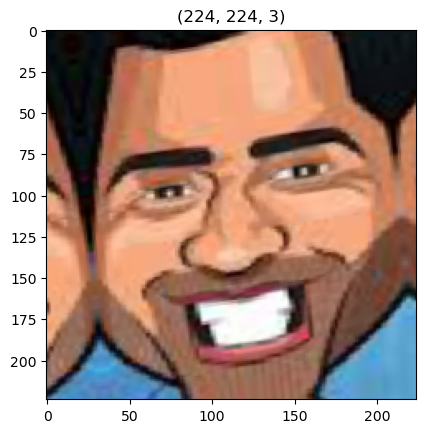

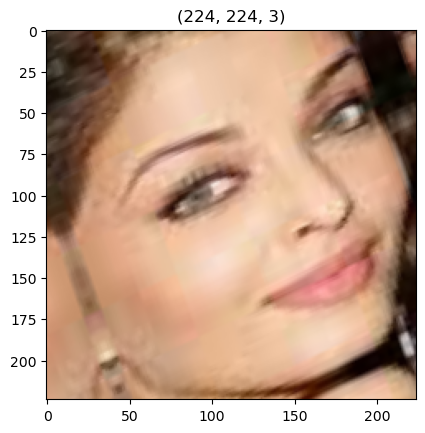

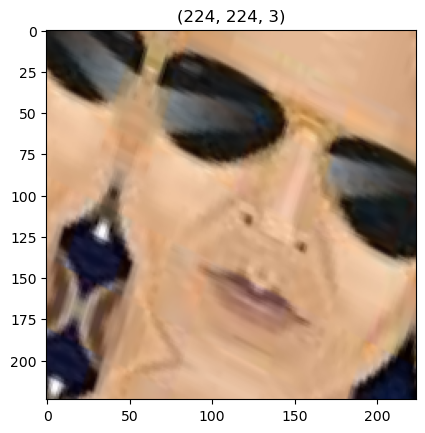

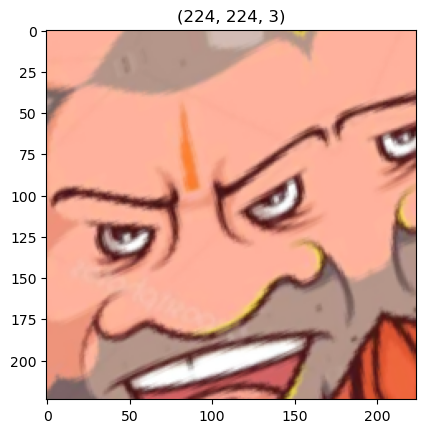

In [43]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [44]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [45]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 30, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\prans\AppData\Local\Temp\ipykernel_23472\2582201090.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 6.8890 - accuracy: 0.4248
Epoch 1: val_accuracy improved from -inf to 0.43359, saving model to best_model.h5
30/30 [==============================] - 42s 1s/step - loss: 6.8890 - accuracy: 0.4248 - val_loss: 5.1325 - val_accuracy: 0.4336
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 2.8751 - accuracy: 0.6083
Epoch 2: val_accuracy improved from 0.43359 to 0.52734, saving model to best_model.h5
30/30 [==============================] - 38s 1s/step - loss: 2.8751 - accuracy: 0.6083 - val_loss: 3.3330 - val_accuracy: 0.5273
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 2.5432 - accuracy: 0.6562
Epoch 3: val_accuracy improved from 0.52734 to 0.56641, saving model to best_model.h5
30/30 [==============================] - 35s 1s/step - loss: 2.5432 - accuracy: 0.6562 - val_loss: 4.4504 - val_accuracy: 0.5664
Epoch 4/30
30/30 [==============================] - ETA: 0s - loss: 2.5320 -

In [46]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("C:/Users/prans/Brain_Dead_hackathon/best_model.h5")

In [47]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

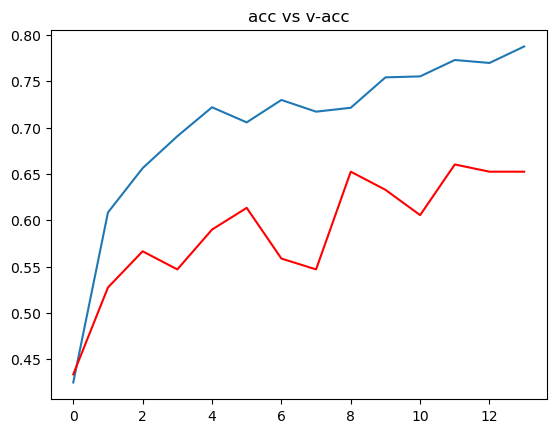

In [48]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

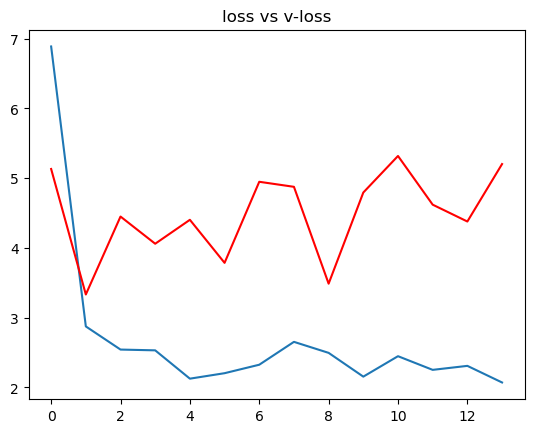

In [49]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [50]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 448ms/step
 the image is of happy


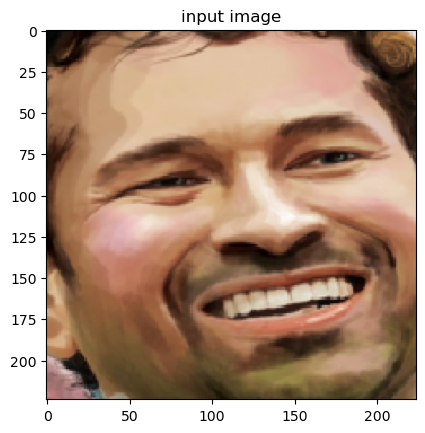

In [51]:
# path for the image to see if it predics correct class

path = "C:/Users/prans/Brain_Dead_hackathon/Test/happy/Sachin_Tendulkar89.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [52]:
test_score = model.evaluate_generator(val_data, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\prans\AppData\Local\Temp\ipykernel_23472\3512463268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(val_data, 32)


[INFO] accuracy: 64.23%
[INFO] Loss:  5.008261203765869


C:\Users\prans\AppData\Local\Temp\ipykernel_23472\712732936.py:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_data)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

       angry       0.24      0.38      0.29        80
       happy       0.26      0.15      0.19       105
     neutral       0.32      0.43      0.37       102
         sad       0.17      0.10      0.13        82

    accuracy                           0.27       369
   macro avg       0.25      0.26      0.24       369
weighted avg       0.25      0.27      0.25       369



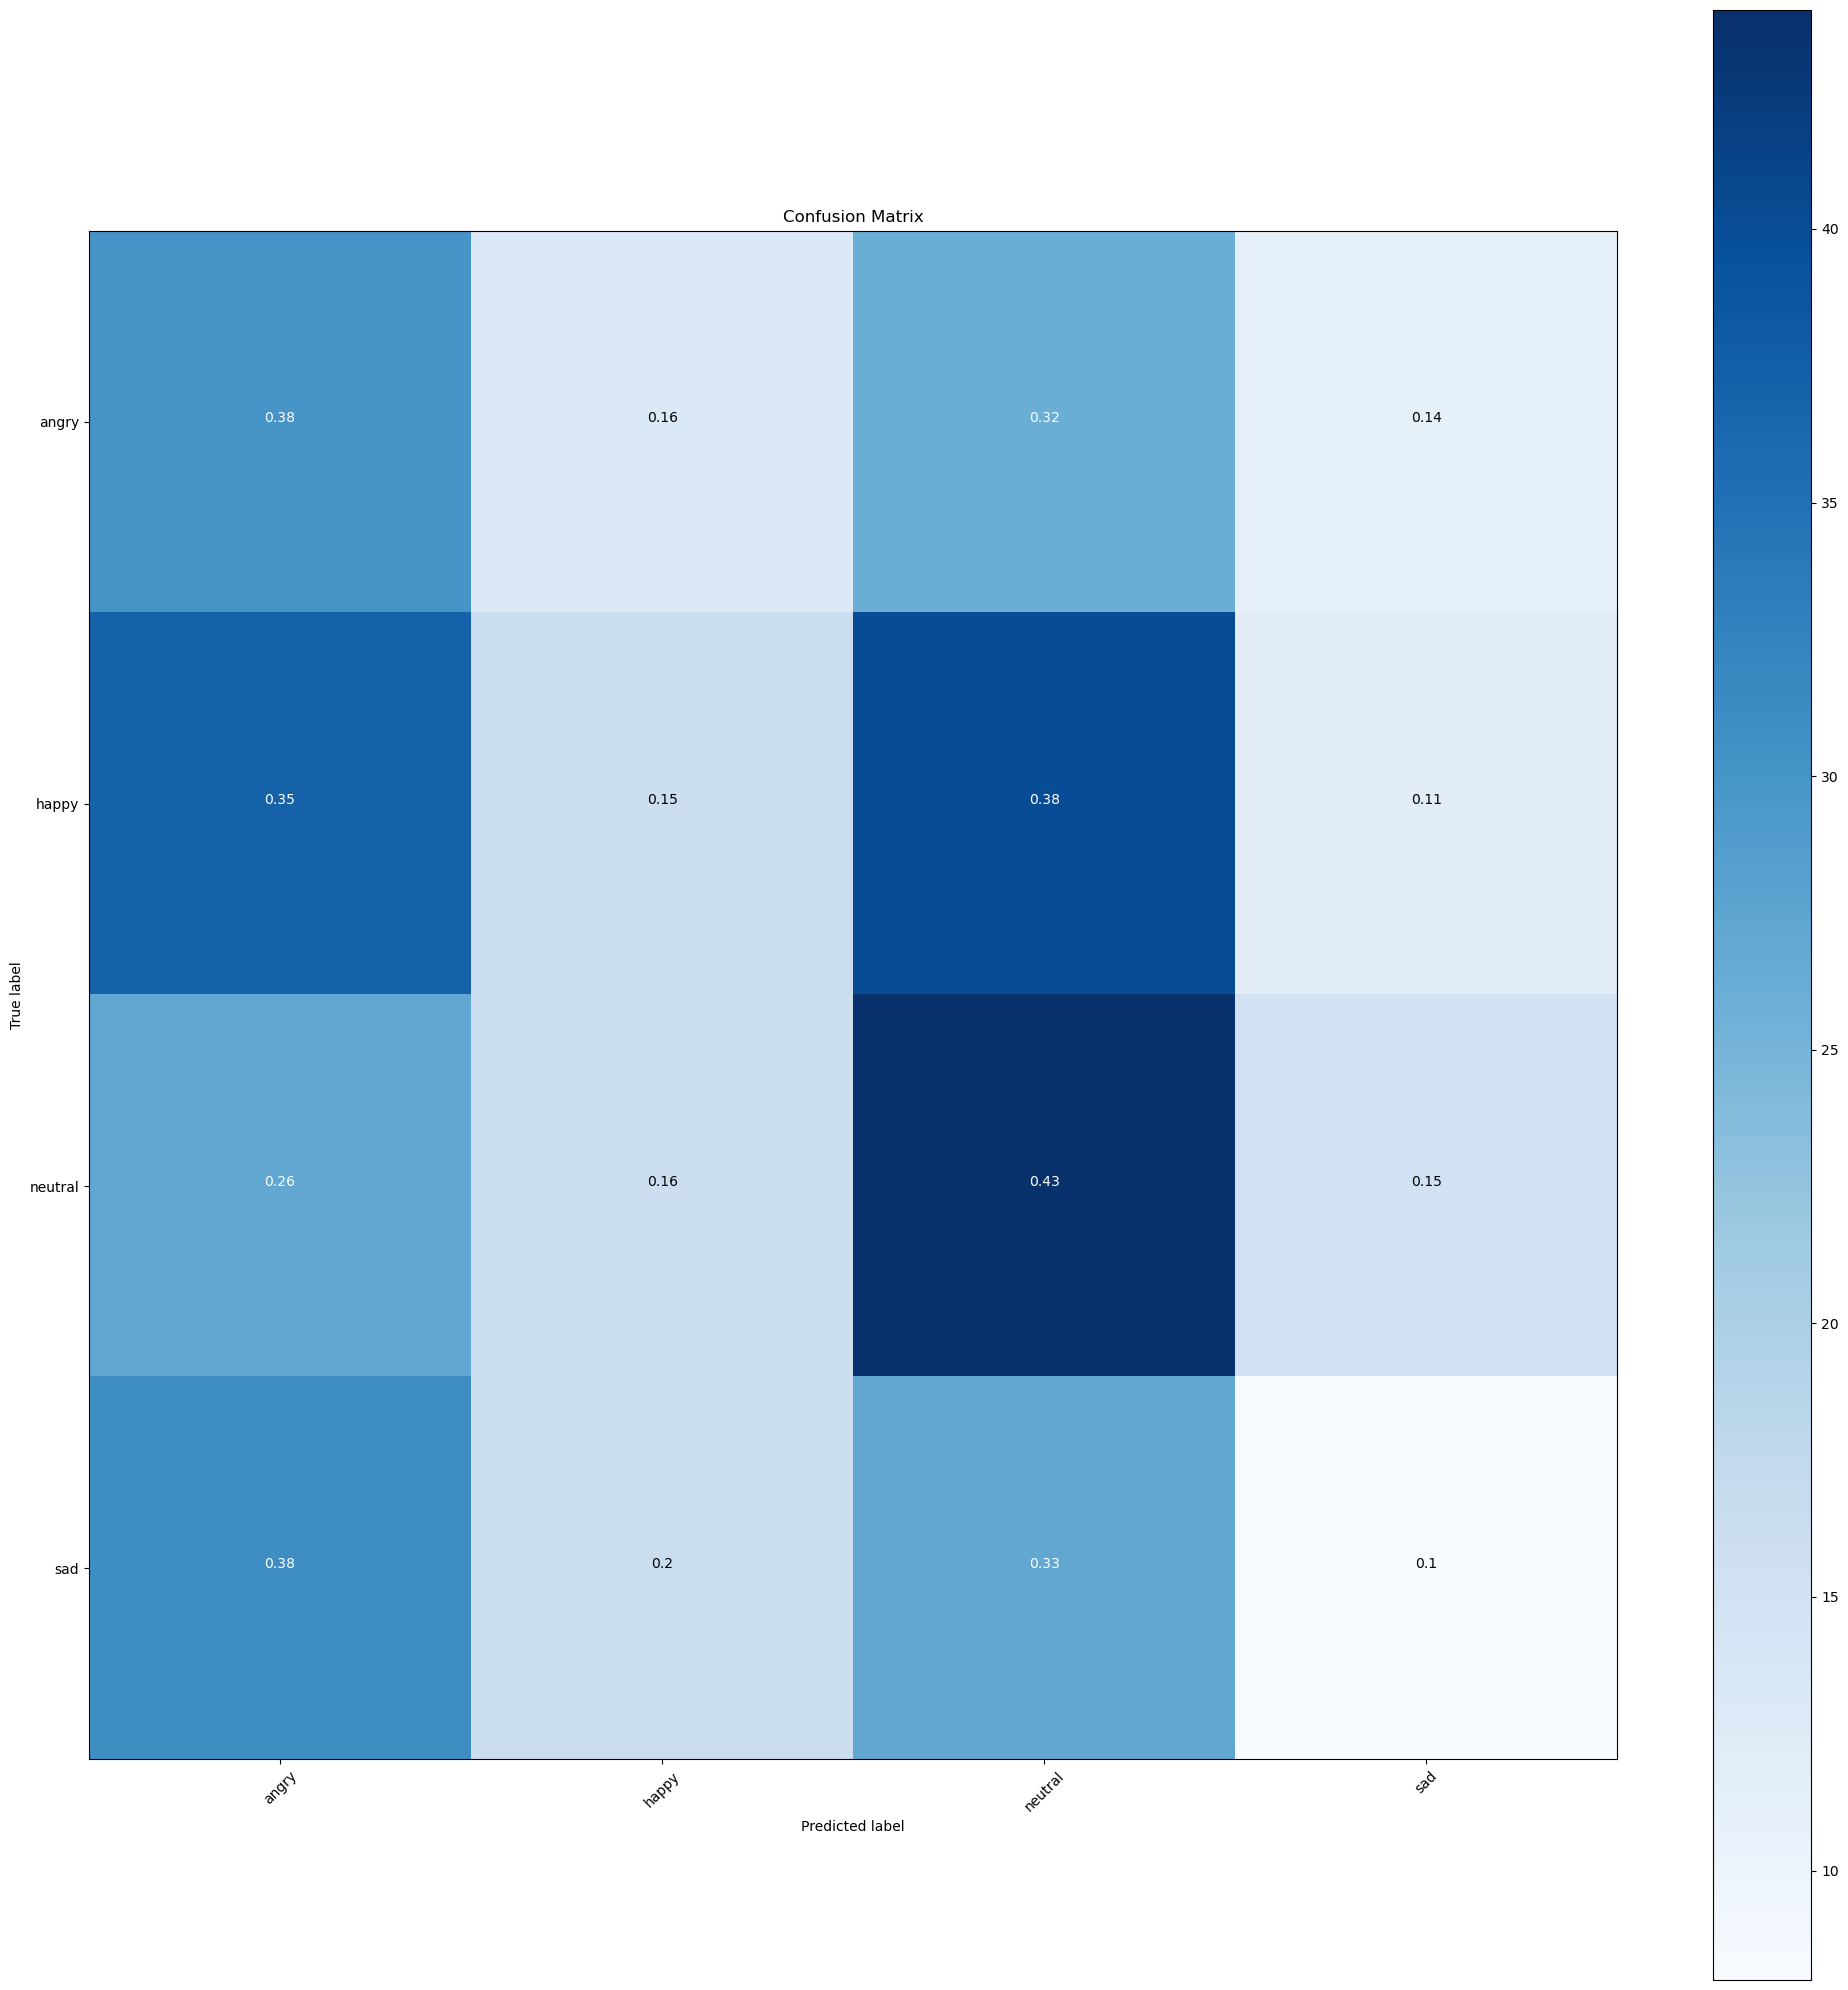

In [53]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_data.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(val_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(val_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(val_data.classes, y_pred, target_names=target_names))